In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
pre_data = pd.read_csv("arquivos/oasis_cross-sectional.csv")

<Axes: >

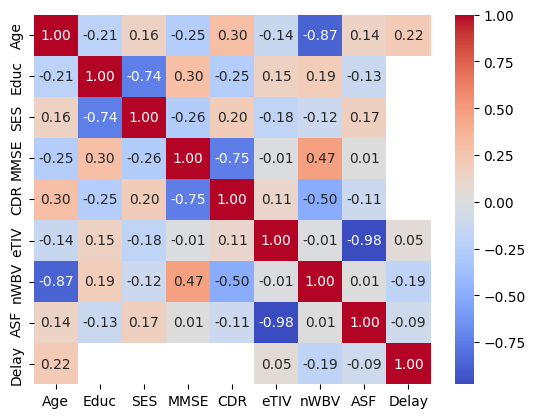

In [5]:
correlation_matrix = pre_data.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

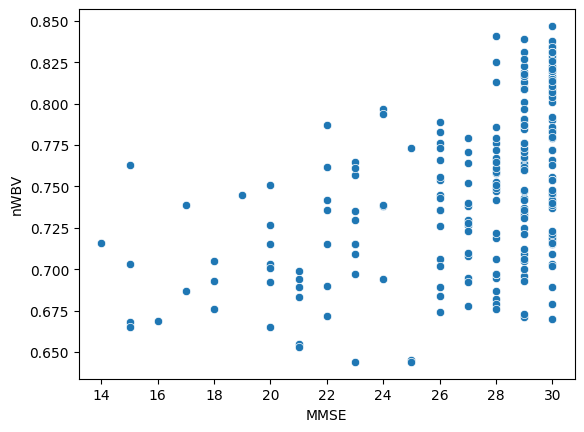

In [6]:
sns.scatterplot(x=pre_data['MMSE'], y = pre_data['nWBV'])
plt.show()

## Cálculos MMSE

queremos prencher os valores de MMSE

Temos inicialmente duas opções:

- MMSE ~ mean(MMSE)
- MMSE ~ Educ + nWBV

In [111]:
calculos_MMSE = pre_data[["Educ","nWBV" ,'MMSE']].copy()
calculos_MMSE.dropna(inplace=True)
calculos_MMSE.reset_index(drop=True, inplace=True)

calculos_MMSE['media'] = calculos_MMSE.MMSE.mean()

In [112]:
mse = mean_squared_error(calculos_MMSE['MMSE'], calculos_MMSE['media'])
mae = mean_absolute_error(calculos_MMSE['MMSE'], calculos_MMSE['media'])

rmse = np.sqrt(mse)

print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Absoluto Médio (MAE): {mae}")

Raiz Quadrada do Erro Quadrático Médio (RMSE): 3.688996030861034
Erro Absoluto Médio (MAE): 2.8121321865097335


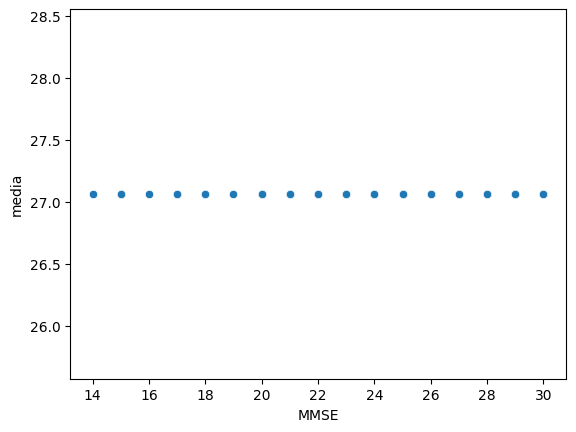

In [113]:
sns.scatterplot(x = calculos_MMSE['MMSE'],y = calculos_MMSE['media'])
plt.show()

In [114]:
calculos_MMSE['mediana'] = calculos_MMSE.MMSE.median()

mse = mean_squared_error(calculos_MMSE['MMSE'], calculos_MMSE['mediana'])
mae = mean_absolute_error(calculos_MMSE['MMSE'], calculos_MMSE['mediana'])

rmse = np.sqrt(mse)

print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Absoluto Médio (MAE): {mae}")

Raiz Quadrada do Erro Quadrático Médio (RMSE): 4.166226927150109
Erro Absoluto Médio (MAE): 2.523404255319149


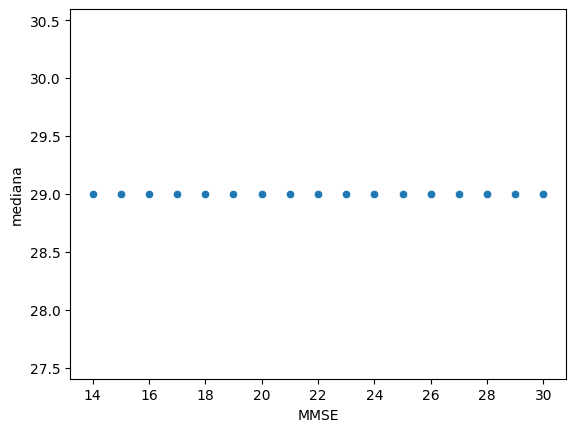

In [115]:
sns.scatterplot(x = calculos_MMSE['MMSE'],y = calculos_MMSE['mediana'])
plt.show()

In [116]:
# Definir as variáveis independentes e dependente
X = calculos_MMSE[['Educ', 'nWBV']]
y = calculos_MMSE['MMSE']

# Ajustar o modelo de regressão linear
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

predictions = model.predict(X)

# Calcular o R²
r2 = r2_score(y, predictions)

# Calcular o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y, predictions)

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"R²: {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")


R²: 0.26454517542045586
Erro Médio Absoluto (MAE): 2.3365938113325653
Raiz Quadrada do Erro Quadrático Médio (RMSE): 3.16363366693008


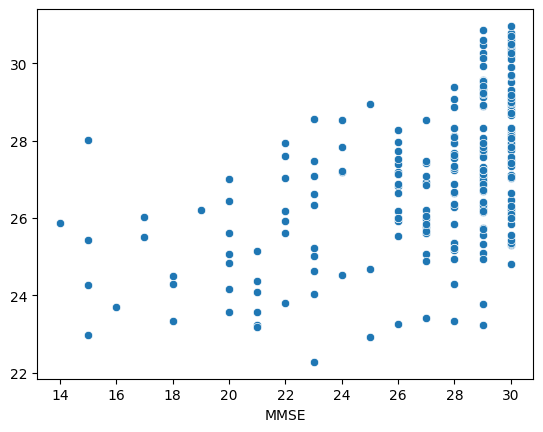

In [117]:
sns.scatterplot(x = y, y = predictions)
plt.show()

## Calculos CDR

In [118]:
calculos_CDR = pre_data[["Educ","nWBV" ,'CDR']].copy()
calculos_CDR.dropna(inplace=True)
calculos_CDR.reset_index(drop=True, inplace=True)


# Dados nulos

In [65]:
dados_nulos = pre_data.loc[pre_data['CDR'].isna()]

In [8]:
dados_nulos

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [9]:
dados_nulos['Age'].describe()

count    201.000000
mean      26.820896
std        9.758471
min       18.000000
25%       20.000000
50%       23.000000
75%       28.000000
max       58.000000
Name: Age, dtype: float64

# Dados a usar

In [3]:
def load_data():
    data = pd.read_csv('arquivos/oasis_cross-sectional.csv')
    # Filtrar os dados onde MMSE e CDR não são nulos
    data = data.dropna(subset=['MMSE', 'CDR'])
    return data

data = load_data()

In [4]:
data.drop('Delay', axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 415
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      235 non-null    object 
 1   M/F     235 non-null    object 
 2   Hand    235 non-null    object 
 3   Age     235 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    235 non-null    int64  
 9   nWBV    235 non-null    float64
 10  ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 22.0+ KB


In [6]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,235.000000,235.000000,216.000000,235.00000,235.000000,235.000000,235.000000,235.000000
mean,72.344681,3.178723,2.490741,27.06383,0.285106,1459.497872,0.749132,1.216511
std,12.091369,1.311510,1.120593,3.69687,0.383405,160.368070,0.047906,0.129427
min,33.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.00000,0.000000,1348.000000,0.713500,1.133500
50%,73.000000,3.000000,2.000000,29.00000,0.000000,1447.000000,0.747000,1.213000
75%,81.000000,4.000000,3.000000,30.00000,0.500000,1548.000000,0.784000,1.302000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.847000,1.563000


In [123]:
data.to_csv("dados.csv", index=False)

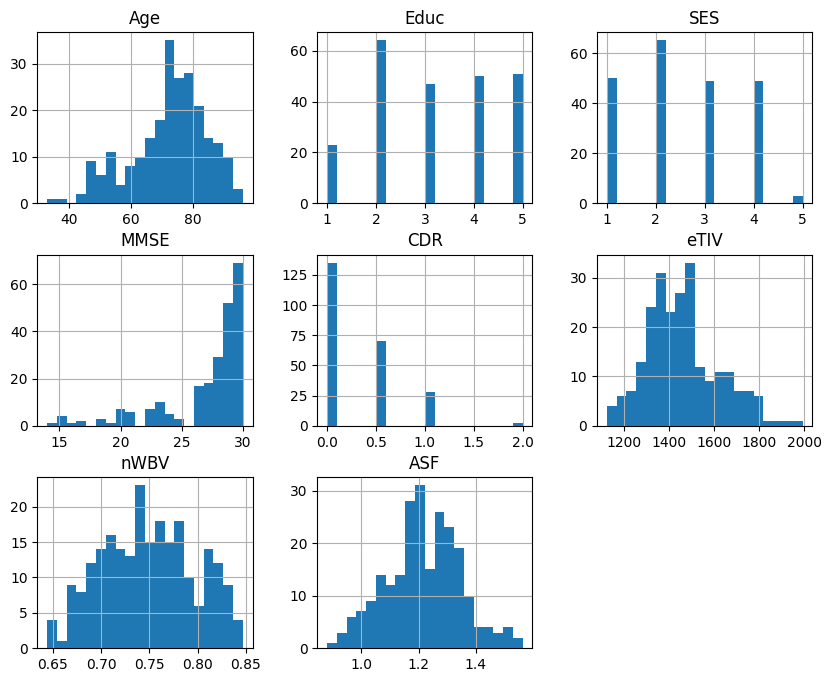

In [124]:
data.hist(figsize=(10, 8), bins=20)
plt.show()

### Testes normalidade


In [125]:
from scipy.stats import kstest, norm

# Exemplo de teste KS contra uma distribuição normal
stat, p = kstest(data.ASF, "norm")
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p}")

Estatística de teste: 0.8166968947504545
Valor-p: 5.83905778169531e-172


In [126]:
from scipy.stats import shapiro


# Aplicando o teste de Shapiro-Wilk
stat, p = shapiro(data.ASF)

print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p}")

# Avaliação do resultado
if p > 0.05:
    print("Os dados parecem seguir uma distribuição normal (não rejeitamos H0).")
else:
    print("Os dados NÃO seguem uma distribuição normal (rejeitamos H0).")

Estatística de teste: 0.9941061813184167
Valor-p: 0.4886298623771559
Os dados parecem seguir uma distribuição normal (não rejeitamos H0).


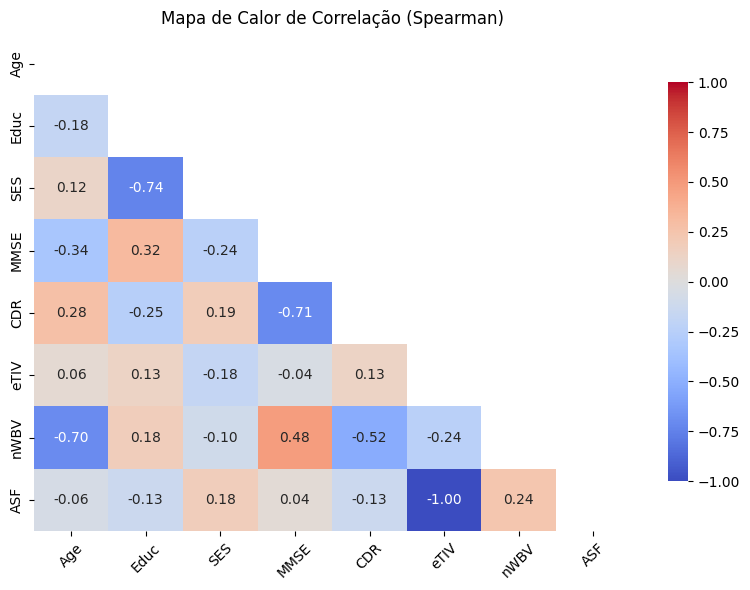

In [134]:
corr_spearman = data.corr(method='spearman', numeric_only=True)

mask = np.triu(np.ones_like(corr_spearman, dtype=bool))
# Plotar o heatmap
plt.figure(figsize=(8, 6))
heatmap =  sns.heatmap(
    corr_spearman,
    mask=mask,
    annot=True,       # Mostra os valores dentro dos quadrados
    fmt=".2f",        # Formato com 2 casas decimais
    cmap='coolwarm',  # Mapa de cores divergente
    center=0,         # Centraliza o branco em 0
    vmin=-1,          # Valor mínimo da escala
    vmax=1,           # Valor máximo da escala
    cbar_kws={"shrink": 0.8},
    yticklabels=True,
    xticklabels=True, # Ajusta o tamanho da barra de cores         
)

# Ajustes finais
plt.title("Mapa de Calor de Correlação (Spearman)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.tight_layout()       # Melhora o espaçamento
plt.show()

## Testes estatisticos

### diferença de  nWBV entre doentes e não doentes

Text(0.5, 1.0, 'Distribuição de nWBV para Pacientes com CDR > 0 e Idade > 60')

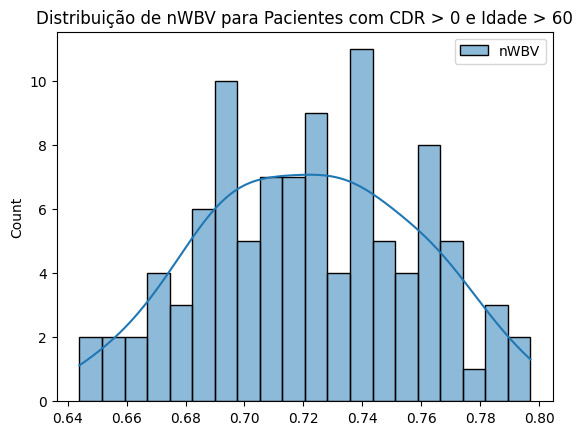

In [ ]:
nwbv_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR'] >0), ['nWBV']].reset_index(drop=True)

sns.histplot(nwbv_doentes_maiores_60, bins=20, kde=True, color='blue')
plt.title('Distribuição de nWBV para Pacientes com CDR > 0 e Idade > 60')


<Axes: ylabel='Count'>

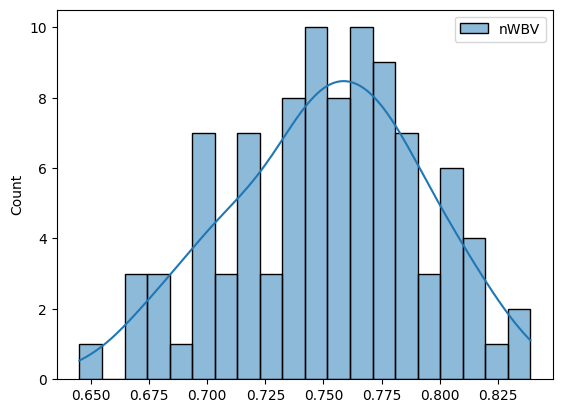

In [19]:
nwbv_nao_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR']  == 0), ['nWBV']]

sns.histplot(nwbv_nao_doentes_maiores_60, bins=20, kde=True, color='blue', label='Doentes Não Doentes Maiores de 60 anos')

In [21]:
# provando normalidade dos dados

from scipy.stats import shapiro

# Teste de normalidade para doentes (CDR > 0)
stat, p_doentes = shapiro(nwbv_doentes_maiores_60['nWBV'])
print(f"Doentes (CDR > 0): p-valor = {p_doentes:.4f}")

# Teste de normalidade para não doentes (CDR = 0)
stat, p_nao_doentes = shapiro(nwbv_nao_doentes_maiores_60['nWBV'])
print(f"Não doentes (CDR = 0): p-valor = {p_nao_doentes:.4f}")

Doentes (CDR > 0): p-valor = 0.4960
Não doentes (CDR = 0): p-valor = 0.6798


In [22]:
# temos distribuições normais, podemos usar o teste t de Student para comparar as médias entre os dois grupos.
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, norm
# Teste t de Student para dois grupos independentes 
t_stat, p_value = ttest_ind(nwbv_doentes_maiores_60['nWBV'], nwbv_nao_doentes_maiores_60['nWBV'], equal_var=False)
print(f"Estatística t: {t_stat:.4f}, p-valor: {p_value:.4f}")   


Estatística t: -5.2987, p-valor: 0.0000


In [23]:
from scipy.stats import ttest_ind

# Teste t para amostras independentes
t_stat, p_valor = ttest_ind(
    nwbv_doentes_maiores_60['nWBV'],
    nwbv_nao_doentes_maiores_60['nWBV'],
    alternative='less'  # Teste unilateral: doentes têm nWBV menor
)

print(f"Teste t: p-valor = {p_valor:.4f}")

Teste t: p-valor = 0.0000


Observações:
Teste unilateral: Você está testando especificamente se os doentes têm valores menores, por isso usamos alternative='less'.

Hipótese nula (H₀): Não há diferença no nWBV entre os grupos (ou os doentes têm nWBV maior/igual).

Hipótese alternativa (H₁): Os doentes têm nWBV menor.

Se p-valor < 0.05: Rejeite a hipótese nula e conclua que os doentes têm nWBV significativamente menor.

Se p-valor ≥ 0.05: Não há evidências estatísticas para afirmar que os doentes têm nWBV menor.

In [24]:
# Exemplo de cálculo de Cohen's d (se usar teste t)
import numpy as np

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(nwbv_doentes_maiores_60['nWBV'], nwbv_nao_doentes_maiores_60['nWBV'])
print(f"Cohen's d: {d:.2f}")

Cohen's d: -0.76


Um Cohen's d de -0.76 indica um efeito moderado a grande (na direção esperada) da diferença no volume cerebral normalizado (nWBV) entre os grupos.  

O sinal negativo indica que o primeiro grupo (doentes com CDR > 0) tem um nWBV menor que o segundo grupo (não doentes com CDR = 0), conforme sua hipótese.

### diferença de  MMSE entre doentes e não doentes

Text(0.5, 1.0, 'Distribuição de MMSE para Pacientes com CDR > 0 e Idade > 60')

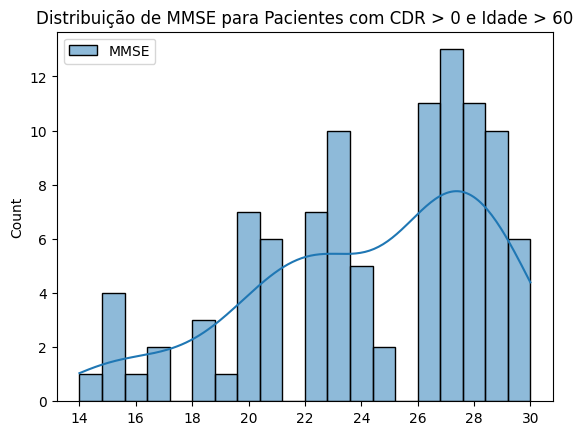

In [26]:
mmse_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR'] >0), ['MMSE']].reset_index(drop=True)

sns.histplot(mmse_doentes_maiores_60, bins=20, kde=True, color='blue')
plt.title('Distribuição de MMSE para Pacientes com CDR > 0 e Idade > 60')


Text(0.5, 1.0, 'Distribuição de MMSE para não Doentes e Idade > 60')

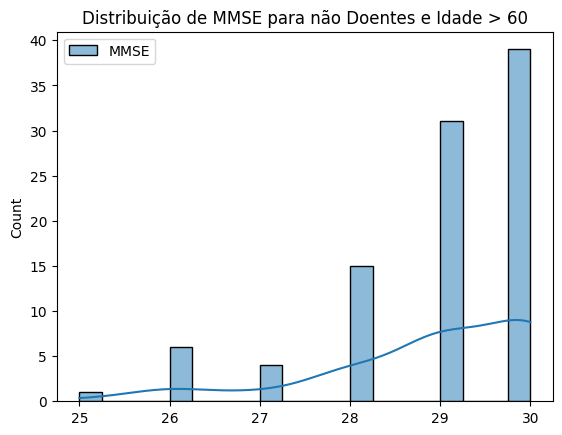

In [27]:
mmse_nao_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR'] ==0 ), ['MMSE']].reset_index(drop=True)

sns.histplot(mmse_nao_doentes_maiores_60, bins=20, kde=True, color='blue')
plt.title('Distribuição de MMSE para não Doentes e Idade > 60')

In [28]:
# provando normalidade dos dados

from scipy.stats import shapiro

# Teste de normalidade para doentes (CDR > 0)
stat, p_doentes = shapiro(mmse_doentes_maiores_60['MMSE'])
print(f"Doentes (CDR > 0): p-valor = {p_doentes:.4f}")

# Teste de normalidade para não doentes (CDR = 0)
stat, p_nao_doentes = shapiro(mmse_nao_doentes_maiores_60['MMSE'])
print(f"Não doentes (CDR = 0): p-valor = {p_nao_doentes:.4f}")

Doentes (CDR > 0): p-valor = 0.0001
Não doentes (CDR = 0): p-valor = 0.0000


In [29]:
# dados não normais

from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney U
u_stat, p_valor = mannwhitneyu(
    mmse_doentes_maiores_60['MMSE'],
    mmse_nao_doentes_maiores_60['MMSE'],
    alternative='less'  # Teste unilateral: doentes têm MMSE menor
)

print(f"Teste U de Mann-Whitney: p-valor = {p_valor:.4f}")

Teste U de Mann-Whitney: p-valor = 0.0000


Observações:
Teste unilateral: Você está testando especificamente se os doentes têm valores menores, por isso usamos alternative='less'.

Hipótese nula (H₀): Não há diferença no MMSE entre os grupos (ou os doentes têm nWBV maior/igual).

Hipótese alternativa (H₁): Os doentes têm MMSE menor.

Se p-valor < 0.05: Rejeite a hipótese nula e conclua que os doentes têm MMSE significativamente menor.

Se p-valor ≥ 0.05: Não há evidências estatísticas para afirmar que os doentes têm MMSE menor.

## mais coisas

In [128]:
cdr_table = data.groupby(['CDR']).size().reset_index(name='Count')
cdr_table

,CDR,Count
0,0.0,135
1,0.5,70
2,1.0,28
3,2.0,2


In [156]:
cdr_descricao = {
    0.0: 'Sem demência',
    0.5: 'Demência muito leve',
    1.0: 'Demência leve',
    2.0: 'Demência moderada'
}

cdr_table = data2.groupby(['CDR']).size().reset_index(name='Count')

# Substituir os valores da coluna CDR
cdr_table['CDR'] = cdr_table['CDR'].map(cdr_descricao)

# Renomear a coluna 'Count' para 'Contagem'
cdr_table = cdr_table.rename(columns={'Count': 'Contagem'})

cdr_table.reset_index(drop=True, inplace=True)

print(cdr_table)

                   CDR  Contagem
0         Sem demência       135
1  Demência muito leve        70
2        Demência leve        28
3    Demência moderada         2


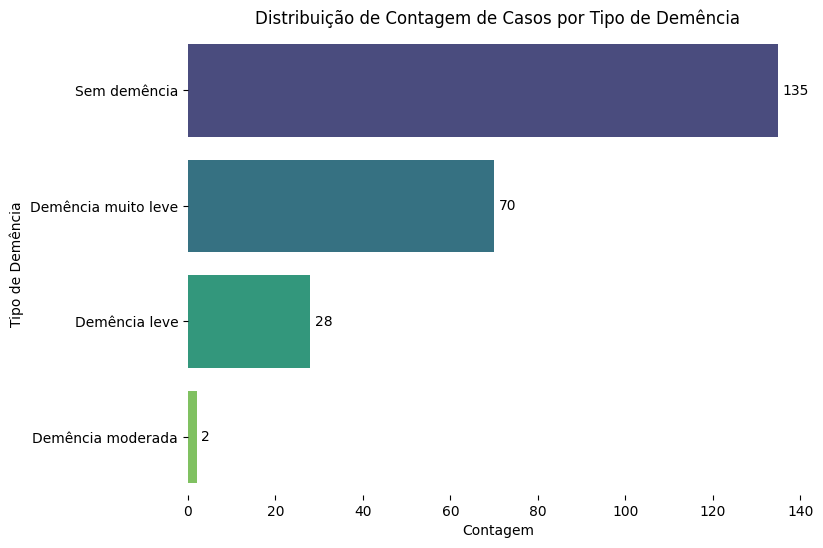

In [165]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Contagem', y='CDR', data=cdr_table, hue='CDR', palette='viridis', dodge=False)

for index, row in cdr_table.iterrows():
    ax.text(row['Contagem'] + 1, index, str(row['Contagem']), color='black', va='center')


# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Adicionando títulos e rótulos
plt.title('Distribuição de Contagem de Casos por Tipo de Demência')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Demência')

# Exibindo o gráfico
plt.show()

In [71]:
com_demencia = data.loc[data['CDR'] > 0]

com_demencia 

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
13,OAS1_0015_MR1,M,R,76,2.0,NaN,28.0,0.5,1738,0.719,1.010
14,OAS1_0016_MR1,M,R,82,2.0,4.0,27.0,0.5,1477,0.739,1.188
19,OAS1_0021_MR1,F,R,80,3.0,3.0,23.0,0.5,1794,0.765,0.978
20,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213
...,...,...,...,...,...,...,...,...,...,...,...
405,OAS1_0447_MR1,F,R,92,4.0,1.0,24.0,0.5,1388,0.739,1.264
409,OAS1_0451_MR1,M,R,73,5.0,3.0,27.0,0.5,1687,0.728,1.040
410,OAS1_0452_MR1,M,R,75,1.0,4.0,22.0,1.0,1656,0.762,1.060
411,OAS1_0453_MR1,F,R,70,1.0,4.0,29.0,0.5,1295,0.748,1.355


In [69]:
colunas_de_interese = ["Age_Range", "M/F", "Hand", "Age", "Educ", "SES", "MMSE", "nWBV", "eTIV","ASF", "CDR"]

In [72]:
com_demencia = com_demencia[colunas_de_interese]

KeyError: "['Age_Range'] not in index"

In [ ]:
com_demencia

,Age_Range,M/F,Hand,Age,Educ,SES,MMSE,nWBV,eTIV,ASF,CDR
2,71-80,F,R,73,4.0,3.0,27.0,0.708,1454,1.207,0.5
13,71-80,M,R,76,2.0,NaN,28.0,0.719,1738,1.010,0.5
14,81-90,M,R,82,2.0,4.0,27.0,0.739,1477,1.188,0.5
19,71-80,F,R,80,3.0,3.0,23.0,0.765,1794,0.978,0.5
20,61-70,F,R,69,2.0,4.0,23.0,0.757,1447,1.213,0.5
...,...,...,...,...,...,...,...,...,...,...,...
405,91-100,F,R,92,4.0,1.0,24.0,0.739,1388,1.264,0.5
409,71-80,M,R,73,5.0,3.0,27.0,0.728,1687,1.040,0.5
410,71-80,M,R,75,1.0,4.0,22.0,0.762,1656,1.060,1.0
411,61-70,F,R,70,1.0,4.0,29.0,0.748,1295,1.355,0.5


## CDR vs Age

In [ ]:
bins_age = [30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ['30-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data['Age_Range'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)

# Tabela para CDR por intervalo de idade
cdr_age_table = data.groupby(['Age_Range', 'CDR'], observed=True).size().reset_index(name='Count')

cdr_age_table  = cdr_age_table.pivot(index='Age_Range', columns='CDR', values='Count').fillna(0)

cdr_age_table


CDR,0.0,0.5,1.0,2.0
Age_Range,,,,
30-40,2.0,0.0,0.0,0.0
41-50,14.0,0.0,0.0,0.0
51-60,23.0,0.0,0.0,0.0
61-70,26.0,16.0,3.0,0.0
71-80,38.0,34.0,17.0,1.0
81-90,29.0,18.0,7.0,1.0
91-100,3.0,2.0,1.0,0.0


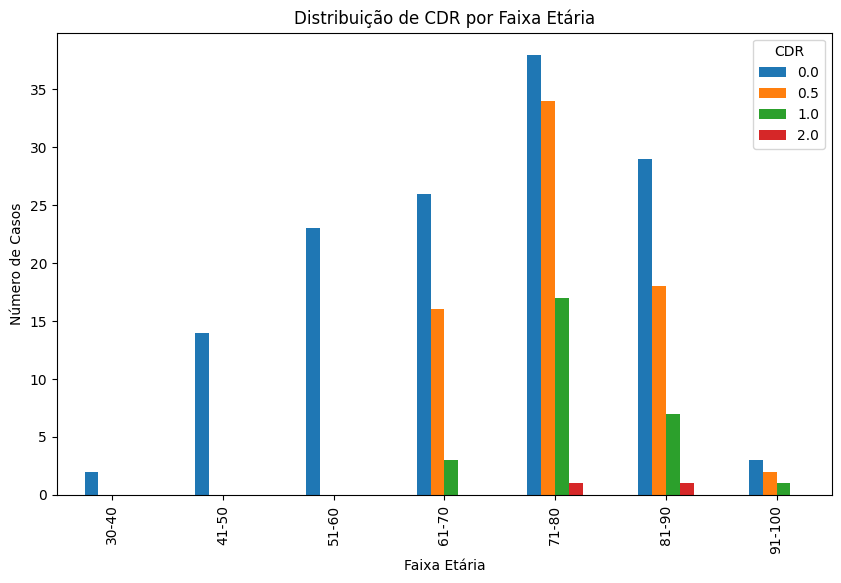

In [ ]:
# Gráfico de barras agrupadas
cdr_age_table.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de CDR por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Casos')
plt.legend(title='CDR')
plt.show()

## CDR vs MMSE

In [ ]:
data["CDR"] = data["CDR"].astype(str)

# Criar o gráfico
fig = px.box(data, y="MMSE", x='CDR', color='CDR', title='Box Plot of MMSE by Clinical Dementia Rating (CDR)')

# Atualizar layout
fig.update_layout(
    xaxis_title='CDR',
    yaxis_title="MMSE"
)

fig.show()

In [ ]:
media_mmse_por_cdr = data.groupby('CDR')['MMSE'].mean().reset_index(name='MMSE médio')
media_mmse_por_cdr

,CDR,MMSE médio
0,0.0,29.096296
1,0.5,25.642857
2,1.0,21.678571
3,2.0,15.000000


## CDR vs nWBV

In [139]:
fig = px.box(data, y="nWBV", x='CDR', color='CDR', title=f'Box Plot of nWBV by Clinical Dementia Rating (CDR)')
fig.update_layout(xaxis_title='CDR', yaxis_title="nWBV")
fig.show()

In [ ]:
media_mmse_por_cdr = data.groupby('CDR')['nWBV'].mean().reset_index(name='nWBV médio')
media_mmse_por_cdr

,CDR,nWBV médio
0,0.0,0.769230
1,0.5,0.729414
2,1.0,0.706179
3,2.0,0.684000


In [166]:
# Criando o histograma com gráficos separados para cada CDR
fig = px.histogram(
    data, 
    x="nWBV", 
    color='CDR', 
    facet_col='CDR', 
    title="Distribuição de nWBV por Clinical Dementia Rating (CDR)"
)

# Ajustando os títulos e layout do gráfico
fig.update_layout(
    xaxis_title='nWBV',
    yaxis_title='Contagem',
    showlegend=False
)
fig.show()

## CDR vs Educ


In [141]:
# Tabela para CDR por Educ
cdr_educ_table = data.groupby(['Educ', 'CDR']).size().reset_index(name='Count')

cdr_educ_table  = cdr_educ_table.pivot(index='Educ', columns='CDR', values='Count').fillna(0)


cdr_educ_table

CDR,0.0,0.5,1.0,2.0
Educ,,,,
1.0,8.0,8.0,6.0,1.0
2.0,29.0,24.0,11.0,0.0
3.0,30.0,13.0,3.0,1.0
4.0,31.0,14.0,5.0,0.0
5.0,37.0,11.0,3.0,0.0


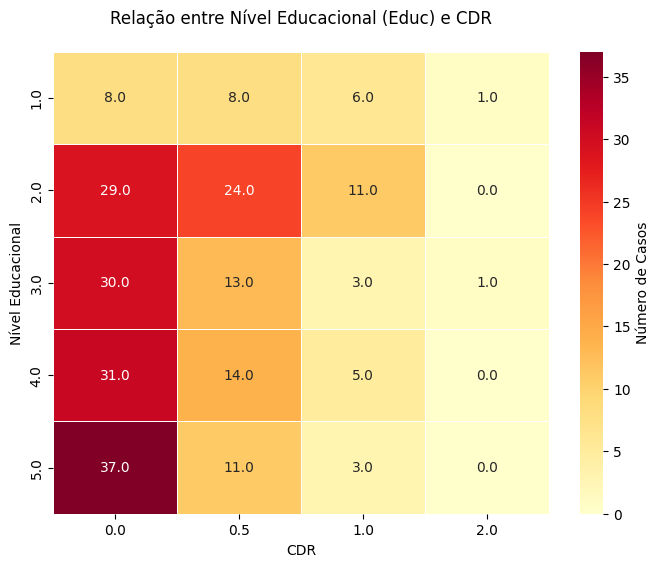

In [142]:
# Gerar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cdr_educ_table, 
    annot=True,  # Mostrar valores nas células
    fmt=".1f",   # Formato decimal
    cmap="YlOrRd",  # Cores (amarelo-laranja-vermelho)
    linewidths=0.5,
    cbar_kws={'label': 'Número de Casos'}
)
plt.title("Relação entre Nível Educacional (Educ) e CDR", pad=20)
plt.xlabel("CDR")
plt.ylabel("Nível Educacional")
plt.show()

In [ ]:
data_dem = data.loc[data["CDR"] > 0]

cdr_educ_table_dem = data_dem.groupby(['Educ', 'CDR']).size().reset_index(name='Count')

cdr_educ_table_dem  = cdr_educ_table_dem.pivot(index='Educ', columns='CDR', values='Count').fillna(0)


cdr_educ_table_dem

CDR,0.5,1.0,2.0
Educ,,,
1.0,8.0,6.0,1.0
2.0,24.0,11.0,0.0
3.0,13.0,3.0,1.0
4.0,14.0,5.0,0.0
5.0,11.0,3.0,0.0


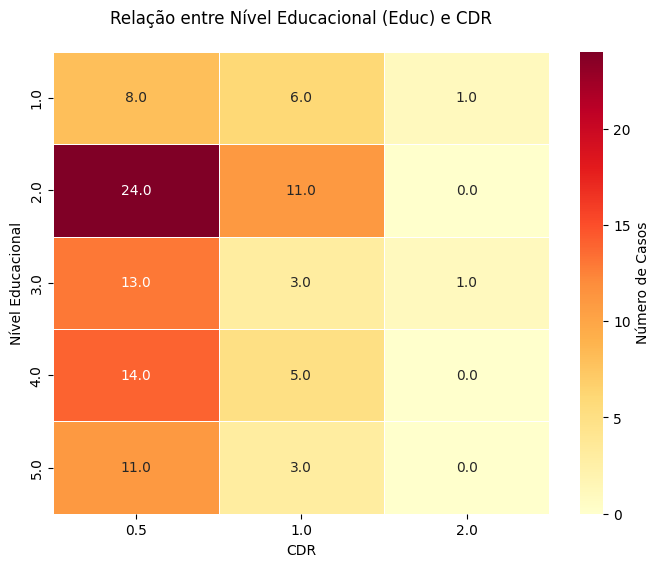

In [ ]:
# Gerar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cdr_educ_table_dem, 
    annot=True,  # Mostrar valores nas células
    fmt=".1f",   # Formato decimal
    cmap="YlOrRd",  # Cores (amarelo-laranja-vermelho)
    linewidths=0.5,
    cbar_kws={'label': 'Número de Casos'}
)
plt.title("Relação entre Nível Educacional (Educ) e CDR", pad=20)
plt.xlabel("CDR")
plt.ylabel("Nível Educacional")
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
cdr_educ_table_dem.index

Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='Educ')

In [ ]:
fig = go.Figure(data=go.Heatmap(
    z=cdr_educ_table_dem.values,                   # Valores da matriz
    x=cdr_educ_table_dem.columns.astype(str),      # Eixo X: CDR (convertido para string)
    y=cdr_educ_table_dem.index.astype(str),        # Eixo Y: Educ (convertido para string)
    colorscale='Viridis',          # Escala de cores (pode ser "Plasma", "Inferno", etc.)
    hoverongaps=False,
    text=cdr_educ_table_dem.values,                # Texto exibido no hover
    hovertemplate='Educ: %{y}<br>CDR: %{x}<br>Casos: %{z}<extra></extra>',
    colorbar=dict(title='Número de Casos')
))

fig.update_layout(
    title='Relação entre Nível Educacional (Educ) e CDR',
    xaxis=dict(title='CDR', side='bottom'),
    yaxis=dict(title='Nível Educacional'),
    width=600, height=500,
    margin=dict(l=50, r=50, b=50, t=50)
)

fig.show()



In [145]:
def load_data2():
    data = pd.read_csv('arquivos/oasis_cross-sectional.csv')
    # Filtrar os dados onde MMSE e CDR não são nulos
    data = data.dropna(subset=['MMSE', 'CDR'])
    return data

data2 = load_data2()

In [ ]:
fig2 = px.scatter(
    data,
    x='Age',
    y='nWBV',
    color='CDR',
    size='eTIV',
    hover_name='ID',
    title='Volume Cerebral Normalizado por Idade e CDR',
    labels={'Age': 'Idade', 'nWBV': 'Volume Cerebral Normalizado', 'CDR': 'CDR'},
    color_discrete_sequence=['#6baed6', '#1f78b4', '#fb9a99', '#e31a1c']  
)

fig2.show()
st.plotly_chart(fig2, use_container_width=True)

# PCA's

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dados_pca = data[['M/F', 'Age', 'Educ', 'SES','MMSE', 'eTIV', 'nWBV', 'CDR']].copy()

dados_pca['M/F'] = dados_pca['M/F'].map({'M': 0, 'F': 1})


dados_pca.dropna(inplace=True)


In [74]:
dados_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     216 non-null    int64  
 1   Age     216 non-null    int64  
 2   Educ    216 non-null    float64
 3   SES     216 non-null    float64
 4   MMSE    216 non-null    float64
 5   eTIV    216 non-null    int64  
 6   nWBV    216 non-null    float64
 7   CDR     216 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 15.2 KB


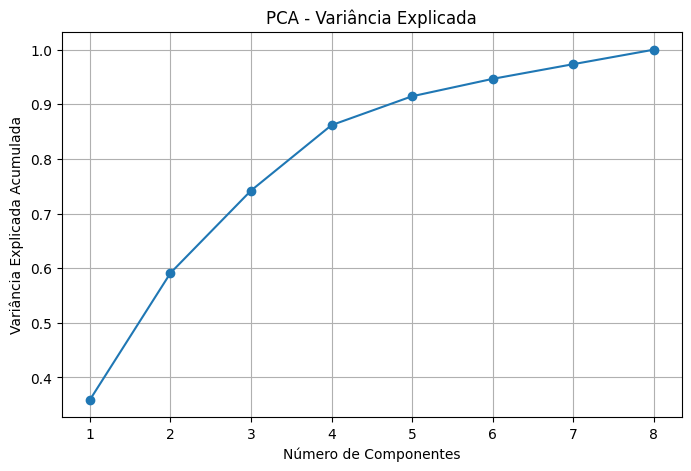

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Normalização
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_pca)

# Passo 2: PCA
pca = PCA(n_components=None)  # Vai manter todos os componentes
dados_pca_transformado = pca.fit_transform(dados_normalizados)

# Passo 3: Variância explicada por componente
explained_variance = pca.explained_variance_ratio_

# Visualização da variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada')
plt.grid(True)
plt.show()


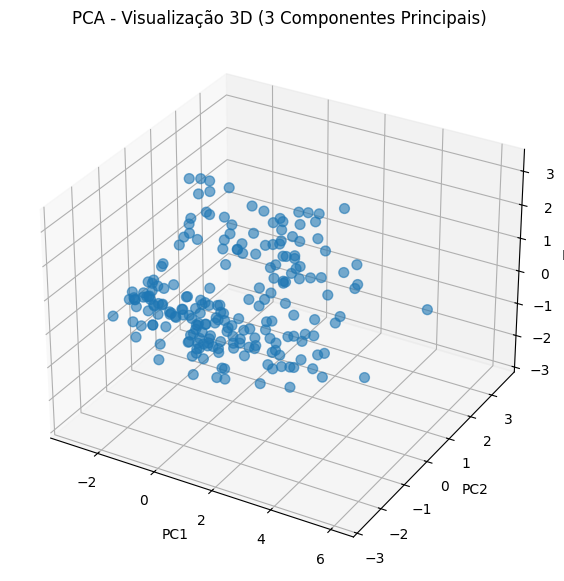

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Normalização
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_pca)

# PCA com 3 componentes
pca_3d = PCA(n_components=3)
pca_resultado = pca_3d.fit_transform(dados_normalizados)

# Criar DataFrame com os 3 componentes
pca_df = pd.DataFrame(data=pca_resultado, columns=['PC1', 'PC2', 'PC3'])

# Visualização 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], s=50, alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Visualização 3D (3 Componentes Principais)')
plt.show()


In [84]:
# As colunas do seu dados_normalizados
colunas = dados_pca.columns

# Criando um DataFrame com os coeficientes (loadings)
loadings = pd.DataFrame(pca_3d.components_.T, columns=['PC1', 'PC2', 'PC3'], index=colunas)

print(loadings)

           PC1       PC2       PC3
M/F  -0.059353 -0.487818 -0.539955
Age   0.395133  0.087975 -0.352491
Educ -0.329147  0.415011 -0.414218
SES   0.299353 -0.429426  0.456402
MMSE -0.468694 -0.028882  0.071057
eTIV  0.049891  0.572931  0.359635
nWBV -0.457075 -0.237386  0.253609
CDR   0.459692  0.110531 -0.074944


In [89]:
pca_df

,PC1,PC2,PC3,Cluster
0,-0.059124,-1.372918,-0.042075,1
1,-2.398105,-1.152066,-1.025222,1
2,0.655957,-0.028613,-0.712883,0
3,-0.475856,2.287726,0.157330,2
4,-2.223363,-1.339310,0.281420,1
...,...,...,...,...
211,0.866708,-2.152736,0.610423,0
212,0.999097,0.262194,-0.592717,0
213,-0.848182,-2.210167,1.172927,1
214,-1.757590,1.749597,1.012008,2


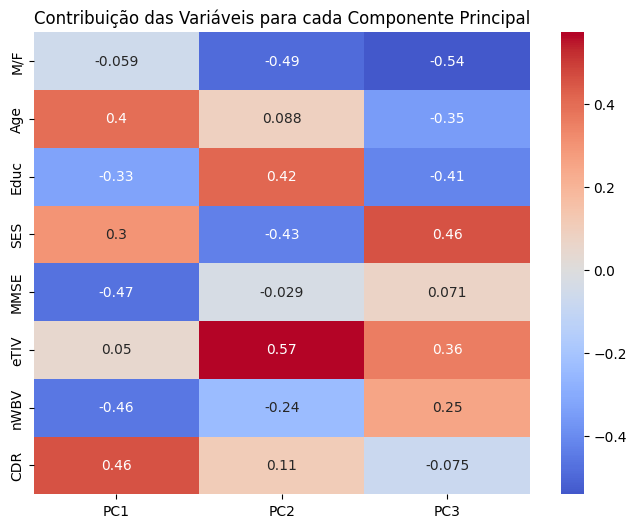

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Contribuição das Variáveis para cada Componente Principal')
plt.show()


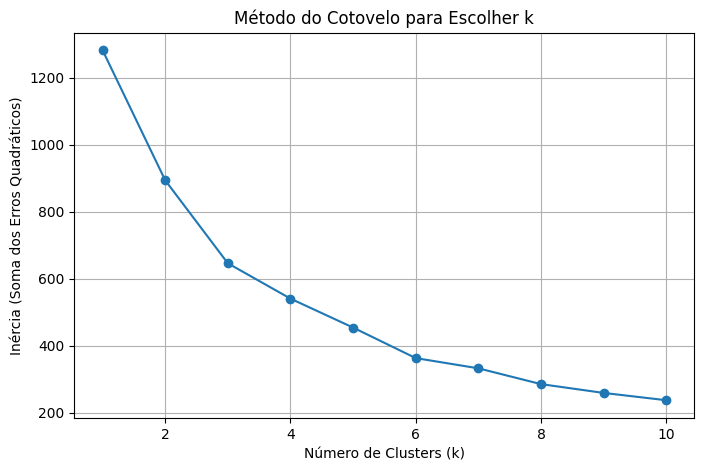

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Testando k de 1 a 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_resultado)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.title('Método do Cotovelo para Escolher k')
plt.grid(True)
plt.show()


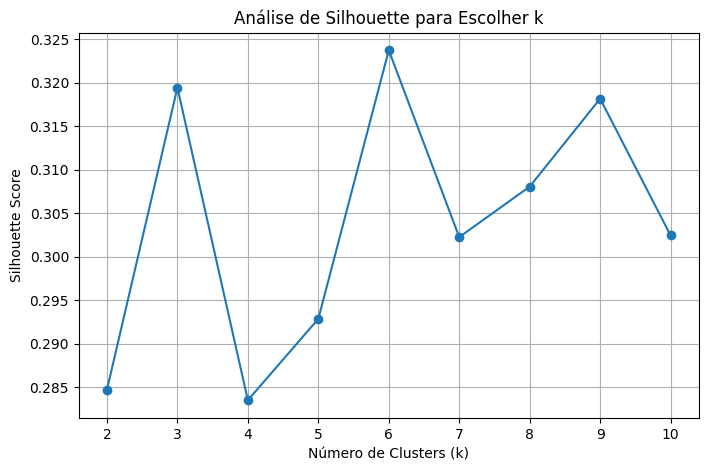

In [78]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # começa de 2, porque silhouette não faz sentido com 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_resultado)
    score = silhouette_score(pca_resultado, cluster_labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Análise de Silhouette para Escolher k')
plt.grid(True)
plt.show()


In [79]:
from sklearn.cluster import KMeans

# Aplicando KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_resultado)

# Adicionando os rótulos ao DataFrame dos componentes principais
pca_df['Cluster'] = labels


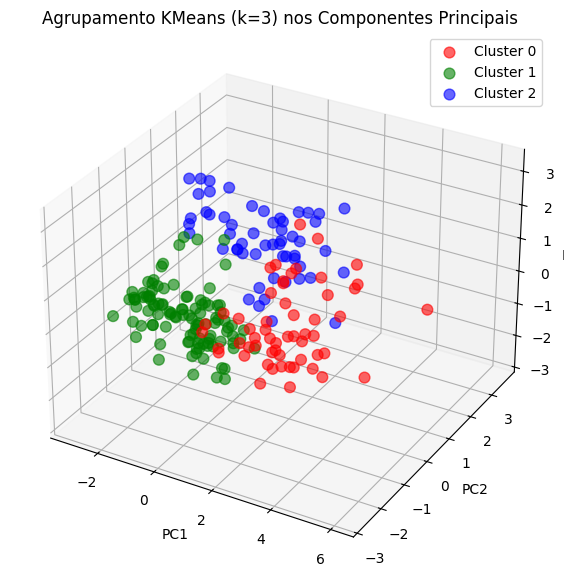

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Paleta de cores
cores = ['red', 'green', 'blue']

for cluster in range(3):
    subset = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               label=f'Cluster {cluster}', s=60, alpha=0.6, color=cores[cluster])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Agrupamento KMeans (k=3) nos Componentes Principais')
ax.legend()
plt.show()


In [81]:
# Junta o cluster com os dados originais (sem valores ausentes)
dados_cluster = dados_pca.copy()
dados_cluster['Cluster'] = pca_df['Cluster'].values

# Médias por cluster
media_por_cluster = dados_cluster.groupby('Cluster')[['MMSE', 'CDR']].mean()
print(media_por_cluster)




              MMSE       CDR
Cluster                     
0        23.285714  0.678571
1        29.142857  0.052381
2        27.963636  0.236364


In [83]:
# Agrupa por Cluster e CDR e conta quantos têm cada valor
frequencia_cdr = dados_cluster.groupby('Cluster')['CDR'].value_counts().unstack(fill_value=0)

print(frequencia_cdr)

CDR      0.0  0.5  1.0  2.0
Cluster                    
0          7   26   21    2
1         94   11    0    0
2         32   20    3    0


C:\Users\jonat\AppData\Local\Temp\ipykernel_17540\2636696518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_cluster, x='Cluster', y='MMSE', palette='Set2')


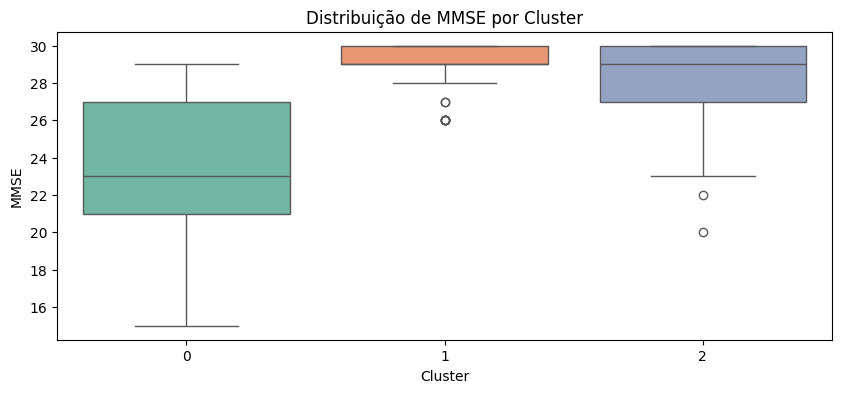

C:\Users\jonat\AppData\Local\Temp\ipykernel_17540\2636696518.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_cluster, x='Cluster', y='CDR', palette='Set2')


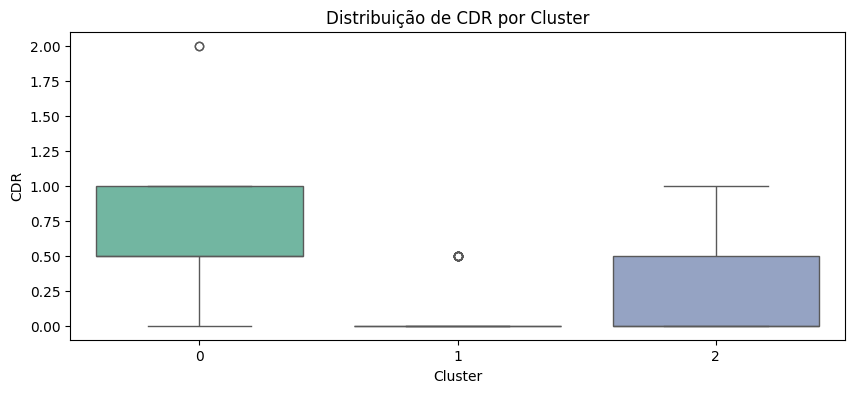

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# MMSE
plt.figure(figsize=(10, 4))
sns.boxplot(data=dados_cluster, x='Cluster', y='MMSE', palette='Set2')
plt.title('Distribuição de MMSE por Cluster')
plt.show()

# CDR
plt.figure(figsize=(10, 4))
sns.boxplot(data=dados_cluster, x='Cluster', y='CDR', palette='Set2')
plt.title('Distribuição de CDR por Cluster')
plt.show()


## EScolhendo quantidades de PCAs

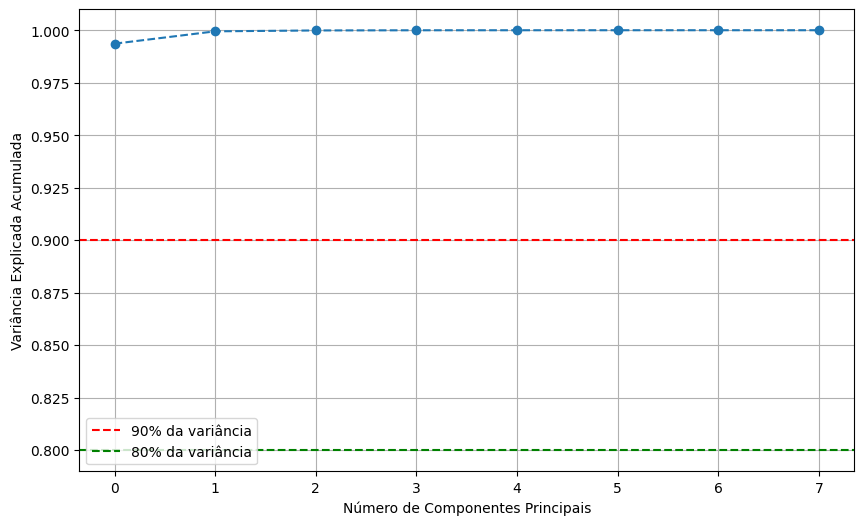

In [57]:
# Aplicar PCA sem reduzir dimensões (para analisar todos os componentes)
pca = PCA().fit(dados_pca)  # 'scaled_data' é o DataFrame padronizado

# Plotar variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% da variância')
plt.axhline(y=0.80, color='g', linestyle='--', label='80% da variância')
plt.grid()
plt.legend()
plt.show()

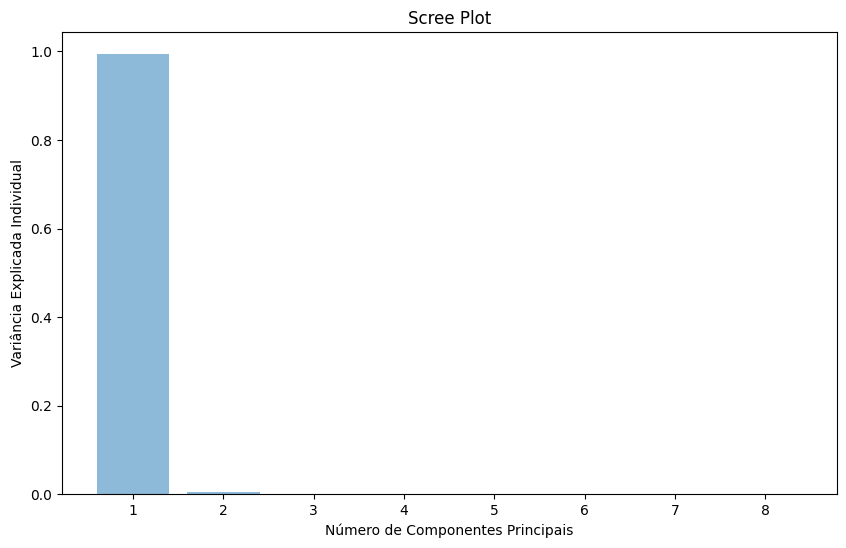

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Individual')
plt.title('Scree Plot')
plt.show()

In [52]:
dados_pca.describe()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,CDR
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.671296,72.444444,3.231481,2.490741,27.324074,1458.638889,0.750500,0.261574
std,0.470833,12.306424,1.333689,1.120593,3.436680,160.523125,0.048271,0.382593
min,0.000000,33.000000,1.000000,1.000000,15.000000,1123.000000,0.644000,0.000000
25%,0.000000,66.000000,2.000000,2.000000,26.000000,1346.000000,0.715000,0.000000
50%,1.000000,73.000000,3.000000,2.000000,29.000000,1445.500000,0.748500,0.000000
75%,1.000000,81.000000,4.000000,3.000000,30.000000,1536.500000,0.786000,0.500000
max,1.000000,96.000000,5.000000,5.000000,30.000000,1992.000000,0.841000,2.000000


## 2 PCAs

In [53]:
# Aplicar PCA
pca = PCA(n_components=2)  # Você pode ajustar o número de componentes
principal_components = pca.fit_transform(dados_pca)

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar a variância explicada por cada componente
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância explicada total:", sum(pca.explained_variance_ratio_))
print("Componentes principais:\n", pca.components_)

Variância explicada por cada componente: [0.99358869 0.00588363]
Variância explicada total: 0.9994723119824506
Componentes principais:
 [[-1.65421805e-03  2.96257463e-03  1.38076392e-03 -1.28804050e-03
  -2.18594902e-04  9.99992398e-01 -6.44102046e-05  2.70900712e-04]
 [-1.63775867e-03 -9.95175844e-01  2.40382527e-02 -1.57466040e-02
   9.31587064e-02  2.91539743e-03  2.87126787e-03 -1.00635654e-02]]


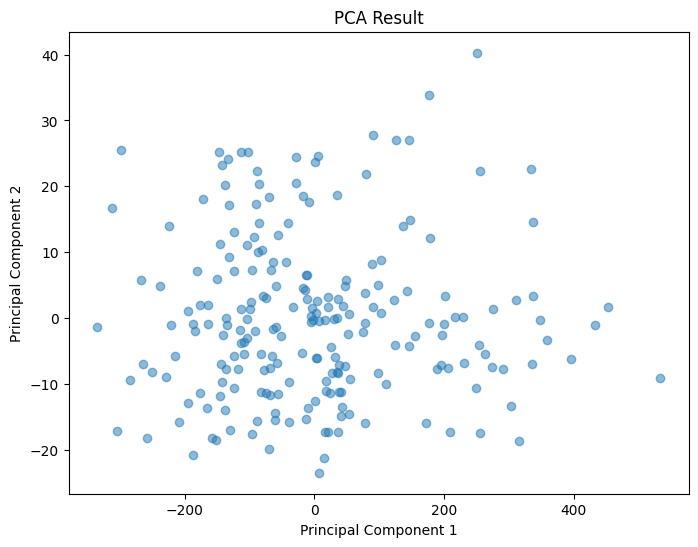

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

In [56]:
# Criar um DataFrame para os loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=dados_pca.columns)
print(loadings)

           PC1       PC2
M/F  -0.001654 -0.001638
Age   0.002963 -0.995176
Educ  0.001381  0.024038
SES  -0.001288 -0.015747
MMSE -0.000219  0.093159
eTIV  0.999992  0.002915
nWBV -0.000064  0.002871
CDR   0.000271 -0.010064


## 3 PCAs

In [59]:
# Aplicar PCA
pca3= PCA(n_components=3)  # Você pode ajustar o número de componentes
principal_components3 = pca3.fit_transform(dados_pca)

# Criar um DataFrame com os componentes principais
pca_df3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2', 'PC3'])

# Visualizar a variância explicada por cada componente
print("Variância explicada por cada componente:", pca3.explained_variance_ratio_)
print("Variância explicada total:", sum(pca3.explained_variance_ratio_))
print("Componentes principais:\n", pca3.components_)

Variância explicada por cada componente: [9.93588685e-01 5.88362666e-03 4.18945420e-04]
Variância explicada total: 0.9998912574026366
Componentes principais:
 [[-1.65421805e-03  2.96257463e-03  1.38076392e-03 -1.28804050e-03
  -2.18594902e-04  9.99992398e-01 -6.44102046e-05  2.70900712e-04]
 [-1.63775867e-03 -9.95175844e-01  2.40382527e-02 -1.57466040e-02
   9.31587064e-02  2.91539743e-03  2.87126787e-03 -1.00635654e-02]
 [-1.00186076e-02 -9.69778964e-02 -1.22325129e-01  9.34028364e-02
  -9.79803310e-01  3.23225312e-04 -3.59007371e-03  8.23399556e-02]]


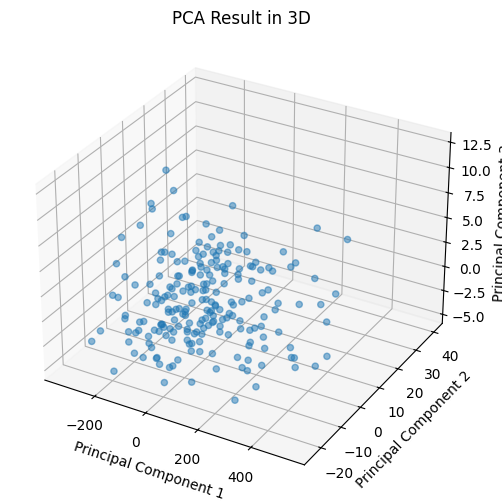

In [62]:
from mpl_toolkits.mplot3d import Axes3D

# Criando a figura e o eixo 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df3['PC1'], pca_df3['PC2'], pca_df3['PC3'], alpha=0.5)
ax.set_xlabel('Principal Component 1')  
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Result in 3D')
plt.show()

# Agrupamento

In [31]:
pre_clausters = data[['M/F', 'Age', 'Educ', 'SES','MMSE', 'eTIV', 'nWBV', 'CDR']].copy() 

In [32]:
pre_clausters

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,CDR
0,F,74,2.0,3.0,29.0,1344,0.743,0.0
1,F,55,4.0,1.0,29.0,1147,0.810,0.0
2,F,73,4.0,3.0,27.0,1454,0.708,0.5
8,M,74,5.0,2.0,30.0,1636,0.689,0.0
9,F,52,3.0,2.0,30.0,1321,0.827,0.0
...,...,...,...,...,...,...,...,...
411,F,70,1.0,4.0,29.0,1295,0.748,0.5
412,F,73,3.0,2.0,23.0,1536,0.730,0.5
413,F,61,2.0,4.0,28.0,1354,0.825,0.0
414,M,61,5.0,2.0,30.0,1637,0.780,0.0
